In [1]:
import numpy as np
import matplotlib.pyplot as plt



In [2]:
X = np.loadtxt("data.txt", dtype = float, usecols=(0,1))
y = np.loadtxt("data.txt",dtype=float, usecols=(2))
feature_1 = np.loadtxt("data.txt", dtype=float, usecols=(0))
feature_2 = np.loadtxt("data.txt", dtype=float, usecols=(1))


In [3]:
X_train = X[:80]
y_train = y[:80]

X_test = X[80:100]
y_test = y[80:100]



In [4]:
print("feature 1")
print(feature_1)

feature 1
[ 0.77 -0.33  0.91 -0.37 -1.84 -1.5  -0.63 -1.08  0.39 -1.26 -5.27 -0.49
  1.48 -1.64  0.45 -1.48 -2.94 -2.19  0.02 -2.24 -3.17 -4.09 -2.41 -3.45
 -3.96 -2.95 -2.42 -1.74 -1.61 -2.59 -2.64 -2.84 -1.45 -3.98 -2.97 -0.68
 -0.1  -1.14 -2.92 -2.14 -3.33 -1.05  0.38 -0.05 -3.2  -2.26 -1.41 -1.2
 -1.69 -1.52  3.88  0.73  0.83  1.59  3.92  3.87  1.14  1.73  2.95  2.61
  2.38  2.3   1.31  1.56  2.67  1.23  1.33  1.36  2.58  2.4   0.51  2.17
  4.38  1.09  0.68  1.93  1.26  1.9   3.13  0.85  1.5   2.95  0.77  1.
  3.19  2.92  2.86  0.97  1.2   1.54  1.65  1.36  2.63  0.9   1.26  0.71
  1.96  2.52  2.77  4.16]


In [5]:
np.random.shuffle(feature_1)
np.random.shuffle(feature_2)
np.random.shuffle(y)


feature_1_train = feature_1[:80]
feature_2_train = feature_2[:80]
y_train = y[:80]

print("feature_1 shape:")
print(feature_1_train.shape)
print("feature_2 shape:")
print(feature_2_train.shape)

feature_1 shape:
(80,)
feature_2 shape:
(80,)


In [6]:
feature_1_test = feature_1[80:100]
feature_2_test = feature_2[80:100]
y_test = y[80:100]

print("feature_1 shape:")
print(feature_1_test.shape)
print("feature_2 shape:")
print(feature_2_test.shape)


feature_1 shape:
(20,)
feature_2 shape:
(20,)


In [7]:
#Normalize the data
#mean_zero
mean_zero = (X-X.mean(axis=0))/X.std(axis=0)


#Unit variace
unit_variance = mean_zero.mean(axis=0)
print("Mean zero: ")
print(mean_zero)
print("Unit variance: ")
print(unit_variance)

Mean zero: 
[[ 0.27893798 -0.65069417]
 [-0.21811658  0.50430477]
 [ 0.34219947 -1.514705  ]
 [-0.23619129 -0.99540316]
 [-0.90043692 -0.64621743]
 [-0.74680187  0.01186336]
 [-0.35367691 -0.82528703]
 [-0.55701741 -0.69098483]
 [ 0.10722822 -1.03121708]
 [-0.63835361 -1.43860042]
 [-2.45034339 -0.48953153]
 [-0.29041542 -1.36697258]
 [ 0.5997641  -1.81464659]
 [-0.81006336 -1.01778686]
 [ 0.13434029  0.02081684]
 [-0.73776452 -0.66412439]
 [-1.39749147 -2.14144862]
 [-1.05859064 -0.80290333]
 [-0.05996285 -0.14929928]
 [-1.08118403 -1.0894147 ]
 [-1.50142106 -1.79226289]
 [-1.91713941  0.32075843]
 [-1.15800155 -1.17447276]
 [-1.62794404 -0.41342695]
 [-1.8583966  -1.03569382]
 [-1.40201015 -0.65964765]
 [-1.16252023 -1.64005373]
 [-0.85525014 -0.63278721]
 [-0.79650733 -0.71336853]
 [-1.23933775 -1.12970536]
 [-1.26193114 -1.12522862]
 [-1.35230469 -1.98476271]
 [-0.72420848 -1.15208906]
 [-1.86743396 -0.61040351]
 [-1.4110475  -0.87005443]
 [-0.3762703  -0.82081029]
 [-0.11418699 -1

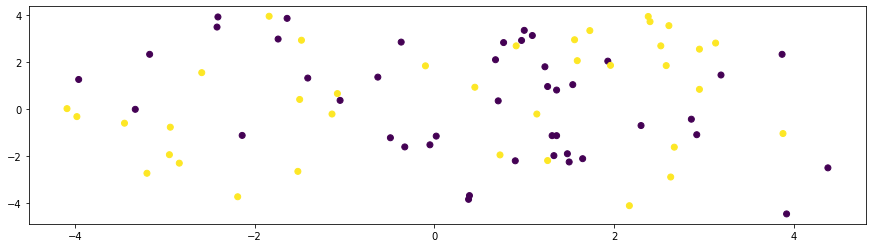

In [8]:
plt.rcParams["figure.figsize"] = 15,4
ax = plt.scatter(feature_1_train, feature_2_train, c=y_train)
plt.show(ax)



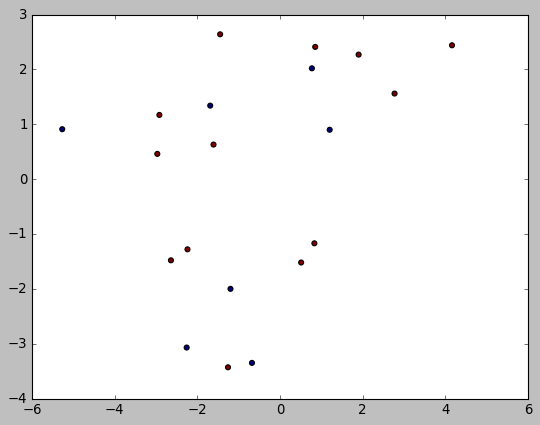

In [9]:

plt.rcParams["figure.figsize"] = 7,3
plt.style.use('classic')
plt.scatter(feature_1_test, feature_2_test, c=y_test)


plt.show()

In [10]:
class Perceptron():
    def __init__(self, learning_rate = 0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.forward = self.forward
        self.weights = None
        self.bias = None
  

    def forward(self, x):  
        return np.where(x>=0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        #initalize weights
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])
        
        for _ in range (self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.forward(linear_output)
               
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update 

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy                

    def predict(self, X):
        linear = np.dot(X, self.weights) + self.bias
        prediction = self.forward(linear)
        return prediction 

   
        
p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train,y_train)
predictions = p.predict(X_test)

print("Perceptron classification accuracy(Train): ")
print(Perceptron.accuracy(y_test, predictions))

p.fit(X_test,y_test)
num = p.predict(X_train)

print("Perceptron classification accuracy(Test): ")
print(Perceptron.accuracy(y_train, num))


        
        
        


Perceptron classification accuracy(Train): 
0.35
Perceptron classification accuracy(Test): 
0.525


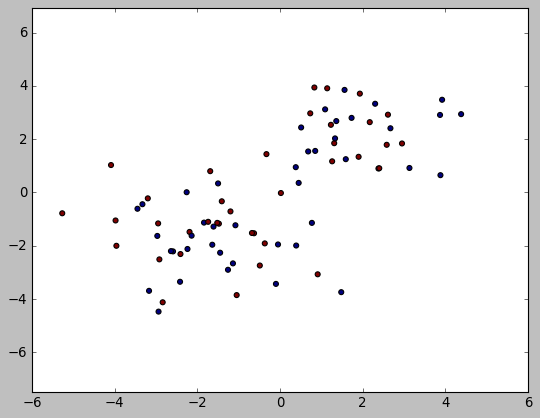

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0], X_train[:,1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:,0])
x0_2 = np.amin(X_train[:,0])

x_1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x_1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x_1_1, x_1_2])

ymin = np.amin(X_train[:,1])
ymax = np.amax(X_train[:,1])
ax.set_ylim(ymin-3, ymax + 3)

plt.show()




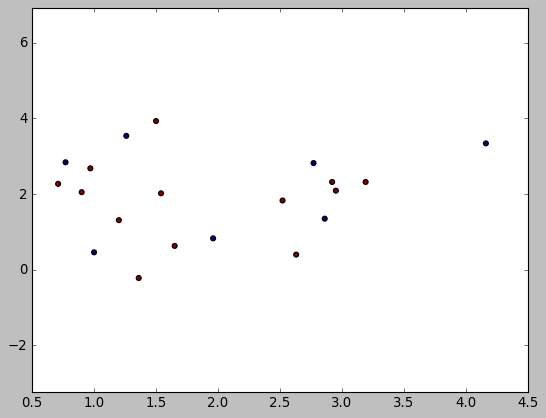

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_test[:,0], X_test[:,1], marker="o", c=y_test)

x0_1 = np.amin(X_test[:,0])
x0_2 = np.amin(X_test[:,0])

x_1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x_1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x_1_1, x_1_2], "k")

ymin = np.amin(X_test[:,1])
ymax = np.amax(X_test[:,1])
ax.set_ylim(ymin-3, ymax + 3)

plt.show()
